# Loading data

In [1]:
import os
import pandas as pd
import pprint

In [2]:
philo_dir = '/Users/anna/Documents/IDMC/repo/data-science-project-main/Philosopher'
phys_dir = '/Users/anna/Documents/IDMC/repo/data-science-project-main/Physicist'

# read in philosopher text files
philo_texts = []
for file in os.listdir(philo_dir):
    with open(os.path.join(philo_dir, file), 'r') as f:
        philo_texts.append(f.read())

# read in physicist text files
phys_texts = []
for file in os.listdir(phys_dir):
    with open(os.path.join(phys_dir, file), 'r') as f:
        phys_texts.append(f.read())

# create dataframe with text-category pairs
data = [(text, "Philosopher") for text in philo_texts] + \
       [(text, "Physicist") for text in phys_texts]

df = pd.DataFrame(data, columns=["text", "category"])


In [3]:
df.describe

<bound method NDFrame.describe of                                                    text     category
0     Dharmakīrti (fl. c. 6th or 7th century; Tibeta...  Philosopher
1     Christina M. Slade (born 1953) is an Australia...  Philosopher
2     Tsang Lap Chuen (Chinese: 曾立存) is a Chinese ph...  Philosopher
3     Callicles (/ˈkælɪkliːz/; Greek: Καλλικλῆς;  c....  Philosopher
4     Sally Haslanger (/ˈhæslæŋər/) is an American p...  Philosopher
...                                                 ...          ...
6454  Luigi Palmieri (22 April 1807 – 9 September 18...    Physicist
6455  Ludwik Leibler, born in 1952 is a Polish-born ...    Physicist
6456  Jogesh C. Pati (born 1937) is an Indian Americ...    Physicist
6457  Moses Hung-Wai Chan (Chinese: 陳鴻渭; pinyin: Ché...    Physicist
6458  Woldemar Voigt (German: [foːkt] (listen); 2 Se...    Physicist

[6459 rows x 2 columns]>

# Text preprocessing

#### Since we want to do relevant statistical analysis we have to preprocess our data by deleting irrelevant for meaning and frequent words (stop words) and lowercase the tokens since the same word in different case is considered as two different words.

Things to do:
* tokenize the texts
* lowercase all words
* remove punctuation
* remove stop words
* remove all non-aphabetical symbols
* normalize words

In [4]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_w = set(stopwords.words('english')) # define the stop words

[nltk_data] Downloading package punkt to /Users/anna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/anna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/anna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/anna/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [5]:
def preprocess(text, remove_stop_words=True):
    
    """ 
    removes non-ASCII chars, performs tokenization, lowercases the tokens,
    delete stopwords, punctuation and non-alphabetical characters,
    converts tokens to normal form
    
    """
    text =  ''.join(filter(lambda x: x in string.printable, text)) # remove non-ASCII chars

    tokens = word_tokenize(text) # tokenization
    tokens = [token.lower() for token in tokens] # lowercase
    tokens = [token for token in tokens if token not in string.punctuation] # remove punctuation
    tokens = [token for token in tokens if token.isalpha()] # remove non-alphabetical characters
    
    if remove_stop_words:
        tokens = [token for token in tokens if token not in stop_w] # remove stopwords

    lemmatizer = WordNetLemmatizer()  
    tokens = [lemmatizer.lemmatize(token) for token in tokens] # convert to normal form

    return tokens
    

In [6]:
df["tokens_without_sw"] = df["text"].apply(lambda x: preprocess(x))
df["tokens_sw"] = df["text"].apply(lambda x: preprocess(x, remove_stop_words=False))
df["sentences"] = df["text"].apply(lambda x: sent_tokenize(x))
df["sentences_tokens"] = df["sentences"].apply(lambda x: [preprocess(sent, remove_stop_words=True) for sent in x])

In [7]:
df

,text,category,tokens_without_sw,tokens_sw,sentences,sentences_tokens
0,Dharmakīrti (fl. c. 6th or 7th century; Tibeta...,Philosopher,"[dharmakrti, fl, century, tibetan, wylie, chos...","[dharmakrti, fl, or, century, tibetan, wylie, ...","[Dharmakīrti (fl., c. 6th or 7th century; Tibe...","[[dharmakrti, fl], [century, tibetan, wylie, c..."
1,Christina M. Slade (born 1953) is an Australia...,Philosopher,"[christina, slade, born, australian, academic,...","[christina, slade, born, is, an, australian, a...",[Christina M. Slade (born 1953) is an Australi...,"[[christina, slade, born, australian, academic..."
2,Tsang Lap Chuen (Chinese: 曾立存) is a Chinese ph...,Philosopher,"[tsang, lap, chuen, chinese, chinese, philosop...","[tsang, lap, chuen, chinese, is, a, chinese, p...",[Tsang Lap Chuen (Chinese: 曾立存) is a Chinese p...,"[[tsang, lap, chuen, chinese, chinese, philoso..."
3,Callicles (/ˈkælɪkliːz/; Greek: Καλλικλῆς; c....,Philosopher,"[callicles, greek, late, century, bc, thought,...","[callicles, greek, late, century, bc, is, thou...",[Callicles (/ˈkælɪkliːz/; Greek: Καλλικλῆς; c...,"[[callicles, greek, late, century, bc, thought..."
4,Sally Haslanger (/ˈhæslæŋər/) is an American p...,Philosopher,"[sally, haslanger, american, philosopher, prof...","[sally, haslanger, is, an, american, philosoph...",[Sally Haslanger (/ˈhæslæŋər/) is an American ...,"[[sally, haslanger, american, philosopher, pro..."
...,...,...,...,...,...,...
6454,Luigi Palmieri (22 April 1807 – 9 September 18...,Physicist,"[luigi, palmieri, april, september, italian, p...","[luigi, palmieri, april, september, wa, an, it...",[Luigi Palmieri (22 April 1807 – 9 September 1...,"[[luigi, palmieri, april, september, italian, ..."
6455,"Ludwik Leibler, born in 1952 is a Polish-born ...",Physicist,"[ludwik, leibler, born, french, physicist, pro...","[ludwik, leibler, born, in, is, a, french, phy...","[Ludwik Leibler, born in 1952 is a Polish-born...","[[ludwik, leibler, born, french, physicist], [..."
6456,Jogesh C. Pati (born 1937) is an Indian Americ...,Physicist,"[jogesh, pati, born, indian, american, theoret...","[jogesh, pati, born, is, an, indian, american,...",[Jogesh C. Pati (born 1937) is an Indian Ameri...,"[[jogesh, pati, born, indian, american, theore..."
6457,Moses Hung-Wai Chan (Chinese: 陳鴻渭; pinyin: Ché...,Physicist,"[moses, chan, chinese, pinyin, chn, hngwi, phy...","[moses, chan, chinese, pinyin, chn, hngwi, is,...",[Moses Hung-Wai Chan (Chinese: 陳鴻渭; pinyin: Ch...,"[[moses, chan, chinese, pinyin, chn, hngwi, ph..."


# Explanatory Data Analysis

In [8]:
import collections
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import FreqDist
from matplotlib.pyplot import figure

### Distribution of texts by category

<AxesSubplot:xlabel='category', ylabel='count'>

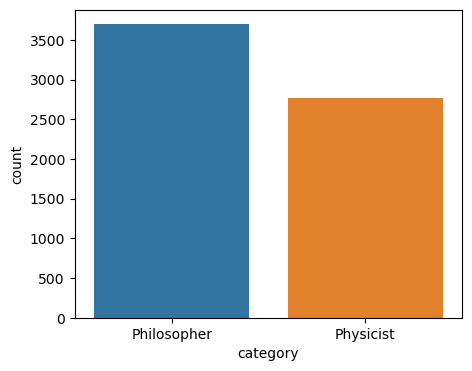

In [9]:
plt.figure(figsize=(5,4))

x= df.category.value_counts()
sns.countplot(x= "category",data=df)

## Vocabulary: statistics and plots

### Get most frequent words per category

In [10]:
# split the initial data into two datasets depending on the category 

df_phil = df[df["category"] == "Philosopher"]
df_phys = df[df["category"] == "Physicist"]

In [11]:
tokens_phil_without_sw = []
tokens_phys_without_sw = []
tokens_phil_sw = []
tokens_phys_sw = []

for tokens_list in df_phil["tokens_without_sw"]:  # get all the tokens without sw for Philosopher category
    tokens_phil_without_sw += tokens_list
    
for tokens_list in df_phys["tokens_without_sw"]:  # get all the tokens without sw for Physicist category
    tokens_phys_without_sw += tokens_list
    
for tokens_list in df_phil["tokens_sw"]:  # get all the tokens with sw for Philosopher category
    tokens_phil_sw += tokens_list

for tokens_list in df_phys["tokens_sw"]:  # get all the tokens with swfor Physicist category
    tokens_phys_sw += tokens_list



In [12]:
# Get the 50 most common words for Philosopher
top_words_phil = dict(collections.Counter(tokens_phil_without_sw).most_common(50))

# Get the 50 most common words for Phiycisist
top_words_phys = dict(collections.Counter(tokens_phys_without_sw).most_common(50))

# Get the 50 most common words for Philosopher with stopwords
top_words_phil_sw = dict(collections.Counter(tokens_phil_sw).most_common(50))

# Get the 50 most common words for Phiycisist with stopwords
top_words_phys_sw = dict(collections.Counter(tokens_phys_sw).most_common(50))

### 50 most frequent words per category without stop words

In [13]:
top_words_phil

{'philosophy': 18137,
 'work': 16588,
 'university': 16384,
 'also': 13535,
 'one': 11892,
 'book': 9689,
 'first': 9158,
 'time': 8601,
 'year': 8052,
 'theory': 7884,
 'life': 7264,
 'state': 6903,
 'published': 6859,
 'new': 6767,
 'philosopher': 6745,
 'would': 6730,
 'science': 6498,
 'later': 6349,
 'world': 6025,
 'professor': 5851,
 'two': 5767,
 'school': 5756,
 'de': 5628,
 'study': 5604,
 'became': 5546,
 'wrote': 5537,
 'human': 5446,
 'idea': 5263,
 'many': 5184,
 'political': 5013,
 'society': 4893,
 'known': 4892,
 'social': 4803,
 'view': 4747,
 'god': 4580,
 'law': 4577,
 'writing': 4570,
 'thought': 4538,
 'history': 4459,
 'according': 4450,
 'philosophical': 4356,
 'born': 4319,
 'american': 4277,
 'john': 4116,
 'may': 3967,
 'college': 3946,
 'death': 3829,
 'people': 3747,
 'however': 3719,
 'part': 3696}

In [14]:
top_words_phys

{'university': 10448,
 'physic': 10179,
 'research': 6233,
 'science': 6115,
 'professor': 4501,
 'institute': 4142,
 'also': 4049,
 'work': 4027,
 'first': 3453,
 'theory': 3433,
 'physicist': 3259,
 'year': 3071,
 'became': 2964,
 'born': 2752,
 'quantum': 2497,
 'member': 2428,
 'one': 2385,
 'study': 2378,
 'nuclear': 2257,
 'society': 2255,
 'scientific': 2184,
 'academy': 2170,
 'state': 2148,
 'field': 2139,
 'received': 2101,
 'national': 2094,
 'new': 2077,
 'worked': 2077,
 'time': 2065,
 'theoretical': 2016,
 'prize': 1982,
 'laboratory': 1967,
 'later': 1955,
 'technology': 1879,
 'published': 1822,
 'known': 1768,
 'director': 1766,
 'physical': 1728,
 'two': 1674,
 'school': 1668,
 'department': 1639,
 'fellow': 1615,
 'scientist': 1614,
 'awarded': 1550,
 'system': 1531,
 'energy': 1525,
 'american': 1520,
 'german': 1458,
 'degree': 1458,
 'paper': 1444}

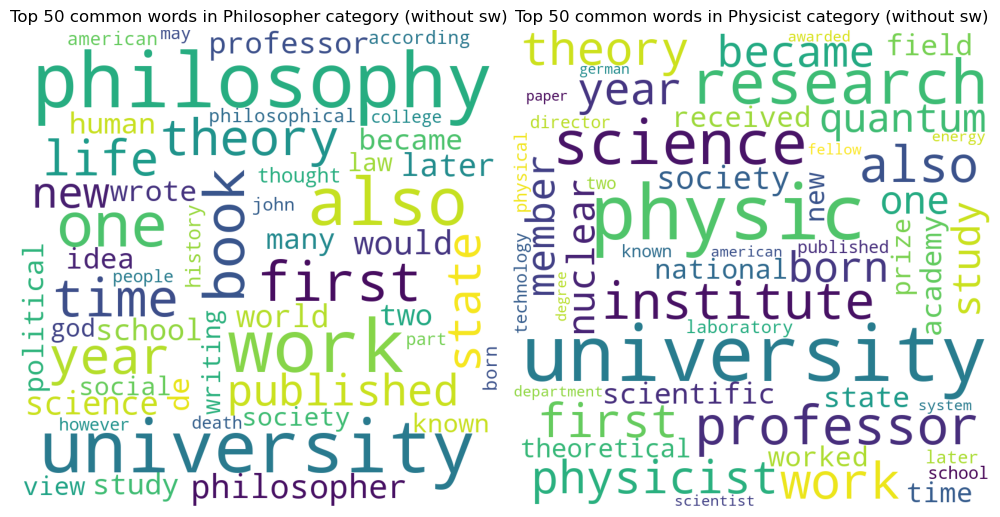

In [15]:
wordcloud_phil = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate_from_frequencies(top_words_phil)
wordcloud_phys = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate_from_frequencies(top_words_phys)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.imshow(wordcloud_phil)
ax1.axis("off")
ax1.set_title("Top 50 common words in Philosopher category (without sw)")

ax2.imshow(wordcloud_phys)
ax2.axis("off")
ax2.set_title("Top 50 common words in Physicist category (without sw)")

plt.tight_layout()
plt.show()

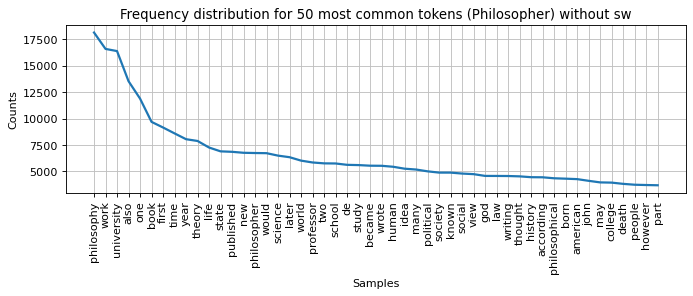

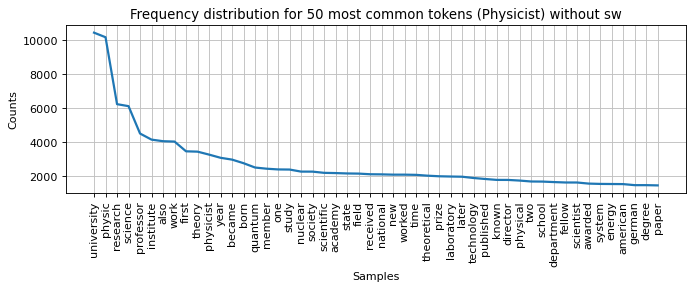

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

fdist1 = FreqDist(top_words_phil)
fdist2 = FreqDist(top_words_phys)

figure(figsize=(10, 6), dpi=80)
plt.subplot(2, 1, 1)
plt.title("Frequency distribution for 50 most common tokens (Philosopher) without sw")
fdist1.plot(50)

figure(figsize=(10, 6), dpi=80)
plt.subplot(2, 1, 1)
plt.title("Frequency distribution for 50 most common tokens (Physicist) without sw")
fdist2.plot(50)

plt.tight_layout()
plt.show()


### 50 most frequent words per category with stop words

In [17]:
top_words_phil_sw

{'the': 321809,
 'of': 236420,
 'and': 163274,
 'a': 159517,
 'in': 149622,
 'to': 116853,
 'he': 68410,
 'his': 65931,
 'wa': 61639,
 'that': 55111,
 'is': 43975,
 'on': 37960,
 'for': 37099,
 'by': 32892,
 'with': 31601,
 'at': 30333,
 'it': 28067,
 'from': 25900,
 'an': 24327,
 'which': 21059,
 'philosophy': 18137,
 'this': 17919,
 'not': 17544,
 'be': 16706,
 'work': 16588,
 'university': 16384,
 'had': 14003,
 'also': 13535,
 'or': 13042,
 'are': 12702,
 'but': 12695,
 'one': 11892,
 'were': 11868,
 'ha': 11188,
 'who': 10986,
 'have': 10051,
 'book': 9689,
 'her': 9566,
 'first': 9158,
 'him': 9119,
 'she': 8788,
 'time': 8601,
 'their': 8543,
 'been': 8450,
 'after': 8220,
 'year': 8052,
 'theory': 7884,
 'other': 7785,
 'all': 7413,
 'they': 7316}

In [18]:
top_words_phys_sw

{'the': 96140,
 'of': 70565,
 'in': 56011,
 'and': 46208,
 'a': 42938,
 'to': 27640,
 'he': 27239,
 'wa': 23846,
 'at': 17048,
 'his': 16256,
 'for': 14454,
 'on': 12023,
 'university': 10448,
 'physic': 10179,
 'with': 9504,
 'from': 9222,
 'is': 7960,
 'that': 7756,
 'by': 7668,
 'an': 6928,
 'research': 6233,
 'science': 6115,
 'she': 4983,
 'professor': 4501,
 'which': 4467,
 'it': 4290,
 'institute': 4142,
 'also': 4049,
 'work': 4027,
 'this': 3780,
 'first': 3453,
 'had': 3448,
 'theory': 3433,
 'her': 3316,
 'ha': 3310,
 'physicist': 3259,
 'after': 3256,
 'year': 3071,
 'were': 3059,
 'became': 2964,
 'born': 2752,
 'where': 2521,
 'quantum': 2497,
 'member': 2428,
 'be': 2416,
 'one': 2385,
 'study': 2378,
 'nuclear': 2257,
 'society': 2255,
 'scientific': 2184}

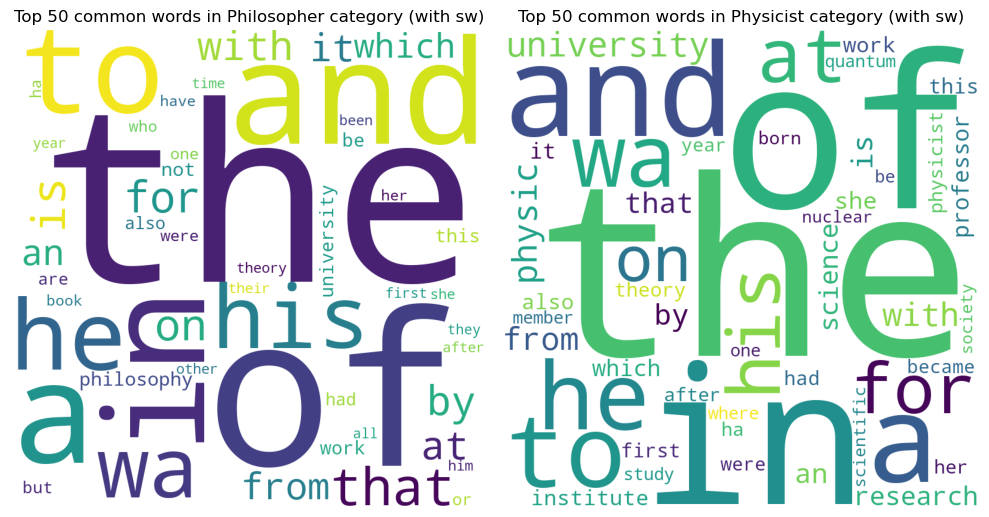

In [19]:
wordcloud_phil = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate_from_frequencies(top_words_phil_sw)
wordcloud_phys = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate_from_frequencies(top_words_phys_sw)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.imshow(wordcloud_phil)
ax1.axis("off")
ax1.set_title("Top 50 common words in Philosopher category (with sw)")

ax2.imshow(wordcloud_phys)
ax2.axis("off")
ax2.set_title("Top 50 common words in Physicist category (with sw)")

plt.tight_layout()
plt.show()

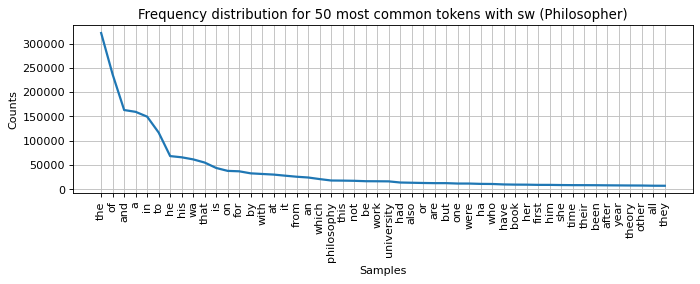

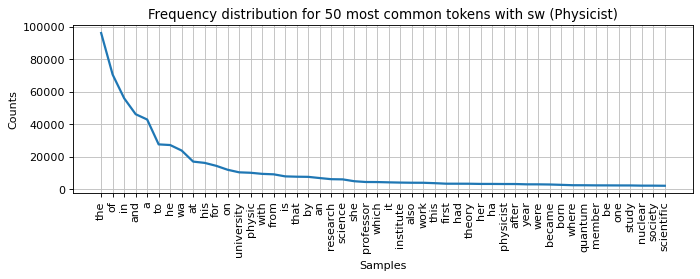

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt

fdist1 = FreqDist(top_words_phil_sw)
fdist2 = FreqDist(top_words_phys_sw)

figure(figsize=(10, 6), dpi=80)
plt.subplot(2, 1, 1)
plt.title("Frequency distribution for 50 most common tokens with sw (Philosopher)")
fdist1.plot(50)

figure(figsize=(10, 6), dpi=80)
plt.subplot(2, 1, 1)
plt.title("Frequency distribution for 50 most common tokens with sw (Physicist)")
fdist2.plot(50)

plt.tight_layout()
plt.show()

### Top 50 most common words in the whole corpus

In [21]:
tokens_sw = []
tokens_without_sw = []

for tokens_list in df["tokens_without_sw"]:  # get all the tokens without sw for Philosopher category
    tokens_without_sw += tokens_list
    
for tokens_list in df["tokens_sw"]:  # get all the tokens without sw for Philosopher category
    tokens_sw += tokens_list
    
# Get the 50 most common words for Philosopher
top_words = dict(collections.Counter(tokens_without_sw).most_common(50))

# Get the 50 most common words for Phiycisist
top_words_sw = dict(collections.Counter(tokens_sw).most_common(50))


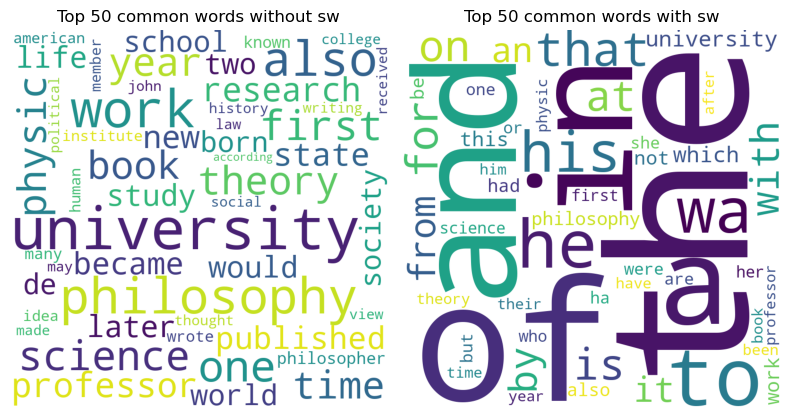

In [22]:
wordcloud_1 = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate_from_frequencies(top_words)
wordcloud_2 = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate_from_frequencies(top_words_sw)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))

ax1.imshow(wordcloud_1)
ax1.axis("off")
ax1.set_title("Top 50 common words without sw")

ax2.imshow(wordcloud_2)
ax2.axis("off")
ax2.set_title("Top 50 common words with sw")

plt.tight_layout()
plt.show()

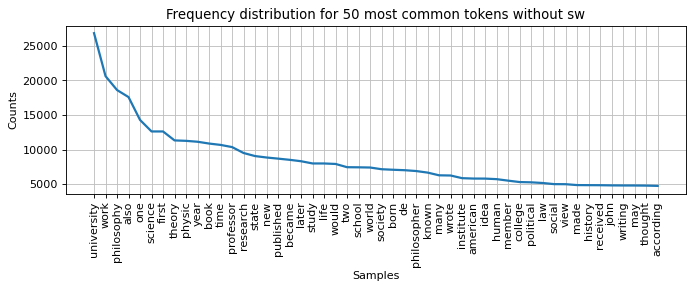

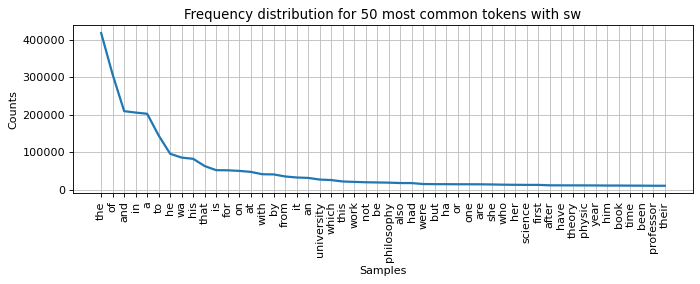

<Figure size 640x480 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt

fdist1 = FreqDist(tokens_without_sw)
fdist2 = FreqDist(tokens_sw)

figure(figsize=(10, 6), dpi=80)
plt.subplot(2, 1, 1)
plt.title("Frequency distribution for 50 most common tokens without sw")
fdist1.plot(50)

figure(figsize=(10, 6), dpi=80)
plt.subplot(2, 1, 1)
plt.title("Frequency distribution for 50 most common tokens with sw")
fdist2.plot(50)

plt.tight_layout()
plt.show()

## Tokens statistics

In [24]:
from statistics import mean, median
import pandas as pd

### Calculate tokens statistics per each category

Here we will work with tokens without considering stop words since they don't contain any significant information that could be useful for analysis.

In [25]:
df["num_tokens"] = df["tokens_without_sw"].apply(lambda x: len(x))   
df["num_of_sentences"] = df["sentences_tokens"].apply(lambda x: len(x))  # number of sentences per text
df["num_tokens_per_sentence"] = df["num_tokens"] / df["num_of_sentences"]  # average number of tokens per sentence

In [26]:
def calculate_token_statistics(df):
    
    """
    Calculate the min, max, mean and median number of tokens for each category,
    min, max, average number of tokens per sentence for each category
    
    """
    
    
    df_stats = pd.DataFrame(columns=["category", "num_tokens_per_cat",  "min_num_tokens", "max_num_tokens", 
                                     "mean_num_tokens", "median_num_tokens", "min_num_tokens_per_sentence",
                                     "max_num_tokens_per_sentence", "mean_num_tokens_per_sentence"])
    
    df_stats["category"] = df["category"].unique()
    df_stats.set_index("category", inplace=True)
    
    df_stats["num_tokens_per_cat"] = df.groupby("category")["num_tokens"].sum() # total number of tokens per category
    df_stats["min_num_tokens"] = df.groupby("category")["num_tokens"].min() # min number of tokens per category
    df_stats["max_num_tokens"] = df.groupby("category")["num_tokens"].max() # max number of tokens per category
    df_stats["mean_num_tokens"] = df.groupby("category")["num_tokens"].mean() # average number of tokens per category
    df_stats["median_num_tokens"] = df.groupby("category")["num_tokens"].median() # median number of tokens per category
    

    df_stats["min_num_tokens_per_sentence"] = df.groupby("category")["num_tokens_per_sentence"].min() # min number of tokens per sentence per category
    df_stats["max_num_tokens_per_sentence"] = df.groupby("category")["num_tokens_per_sentence"].max() # max number of tokens per sentence per category
    df_stats["mean_num_tokens_per_sentence"] = df.groupby("category")["num_tokens_per_sentence"].mean() # average number of tokens per sentence per category
    df_stats["median_num_tokens_per_sentence"] = df.groupby("category")["num_tokens_per_sentence"].median() # median number of tokens per sentence per category
     
    return df_stats
    

In [27]:
stats = calculate_token_statistics(df)

In [28]:
stats

,num_tokens_per_cat,min_num_tokens,max_num_tokens,mean_num_tokens,median_num_tokens,min_num_tokens_per_sentence,max_num_tokens_per_sentence,mean_num_tokens_per_sentence,median_num_tokens_per_sentence
category,,,,,,,,,
Philosopher,2709858,7,10919,733.186688,317.0,4.186047,26.5,11.983423,12.000000
Physicist,790295,8,6156,286.027868,181.0,3.398936,38.0,11.430177,11.166667


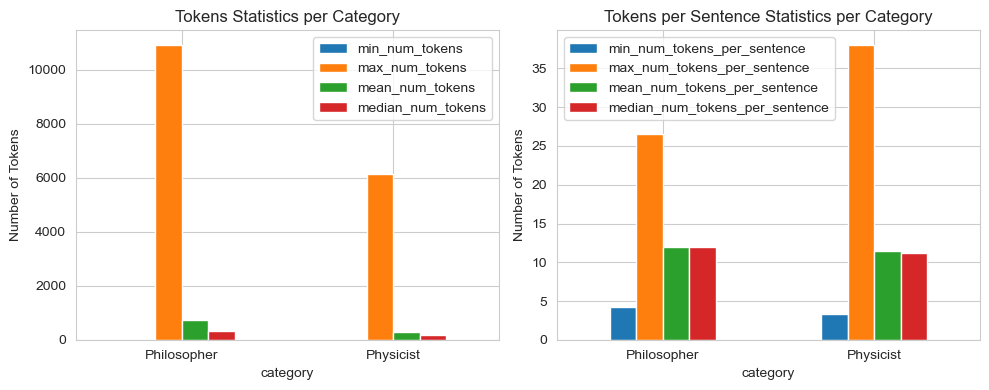

In [31]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

stats[["min_num_tokens", "max_num_tokens", "mean_num_tokens", "median_num_tokens"]].plot(
    kind="bar", ax=axes[0], title="Tokens Statistics per Category", rot=0)
axes[0].set_ylabel("Number of Tokens")
axes[0].legend(title=None)

stats[["min_num_tokens_per_sentence", "max_num_tokens_per_sentence", "mean_num_tokens_per_sentence",
       "median_num_tokens_per_sentence"]].plot(
    kind="bar", ax=axes[1], title="Tokens per Sentence Statistics per Category", rot=0)
axes[1].set_ylabel("Number of Tokens")
axes[1].legend(title=None)

plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.show()


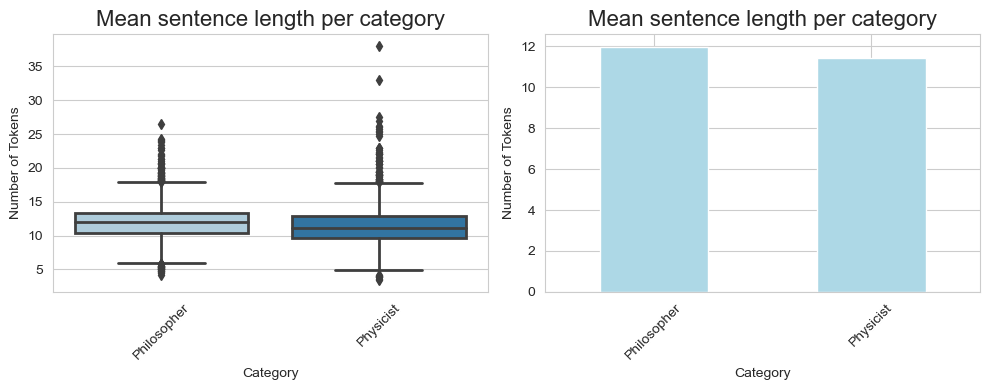

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

mean_data = df.groupby("category")["num_tokens_per_sentence"].mean()
sns.boxplot(x=df["category"], y=df["num_tokens_per_sentence"], palette="Paired", linewidth=2, ax=axes[0])
axes[0].set_title("Mean sentence length per category", fontsize=16)
axes[0].set_xlabel("Category", fontsize=10)
axes[0].set_ylabel("Number of Tokens", fontsize=10)
axes[0].tick_params(axis='x', labelrotation=45)

mean_data.plot(kind="bar", color="LightBlue", rot=0, ax=axes[1])
axes[1].set_title("Mean sentence length per category", fontsize=16)
axes[1].set_xlabel("Category", fontsize=10)
axes[1].set_ylabel("Number of Tokens", fontsize=10)
axes[1].tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()


## Sentence statistics

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_sentence_stats(df):
    
    """
    calculate the min, max, mean and median 
    number of sentences for each category
    
    """

    df_stats = pd.DataFrame(columns=["category", "min_num_sentences", "max_num_sentences", 
                                  "avg_num_sentences", "median_num_sentences"])
    
    df_stats["category"] = df["category"].unique()
    df_stats.set_index("category", inplace=True)
    
    df_stats["min_num_sentences"] = df.groupby("category")["num_of_sentences"].min() # min number of sentences per category
    df_stats["max_num_sentences"] = df.groupby("category")["num_of_sentences"].max() # max number of sentences per category
    df_stats["avg_num_sentences"] = df.groupby("category")["num_of_sentences"].mean() # average number of sentences per category
    df_stats["median_num_sentences"] = df.groupby("category")["num_of_sentences"].median() # median number of sentences per category
    
    return df_stats
    
    
    


In [34]:
sent_stats = calculate_sentence_stats(df)
sent_stats

,min_num_sentences,max_num_sentences,avg_num_sentences,median_num_sentences
category,,,,
Philosopher,1,906,58.192100,27.0
Physicist,1,501,24.460369,17.0


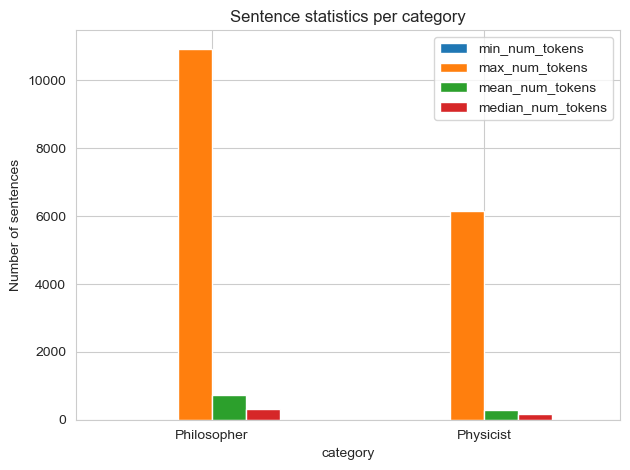

In [35]:
stats[["min_num_tokens", "max_num_tokens", "mean_num_tokens", "median_num_tokens"]].plot(
    kind="bar", title="Sentence statistics per category", rot=0)

plt.ylabel("Number of sentences")
plt.legend(title=None)

plt.tight_layout()
plt.show()


# POS tagging and Named entity recognition

## Vocabularies of POS

For getting POS tags in this analysis I will use spacy library.

In [37]:
import spacy
nlp = spacy.load("en_core_web_sm")

#### As I used nltk before, I had to run spacy. It took around 15 minutes to run

In [50]:
df["merged_tokens"] = df["tokens_without_sw"].apply(lambda x: " ".join(x)) #
df["POS_tags"] = df["merged_tokens"].apply(lambda x: nlp(x)) # POS tagging
df["POS_tags"] = df["POS_tags"].apply(lambda x: [token.pos_ for token in x]) # POS tagging

In [52]:
df["pos_token"] = df["POS_tags"].apply(lambda x: list(zip(x, df["tokens_without_sw"]))) # zip the tokens with their POS tags